In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df=pd.read_csv('ETH-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]


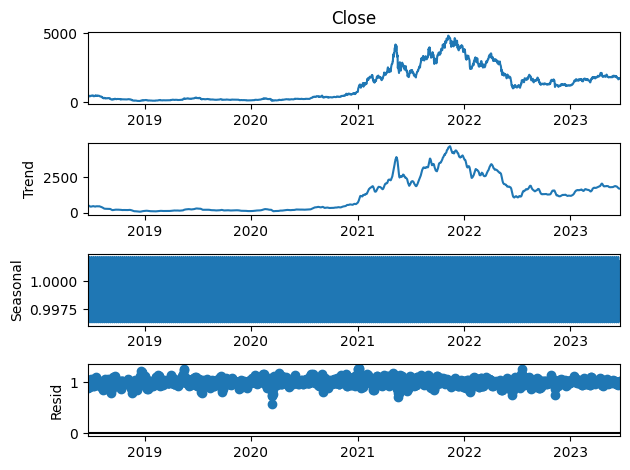

In [ ]:
decompose_result = seasonal_decompose(df['Close'],model='multiplicative',filt=None, period=None, two_sided=False, extrapolate_trend=1)
decompose_result.plot();

In [ ]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

#7 : 2 : 1

In [ ]:
# 7 : 2 : 1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# define ES Model
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7)
# Fit mô hình vào dữ liệu
model_fit = model.fit()

In [ ]:
# 4. Quá trình testing
y_test = np.array(test_data['Close'])
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# 5. Quá trình Validate
y_val = np.array(val_data['Close'])
y_pred_val = model_fit.predict(start=val_data.index[0], end=val_data.index[-1])

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(start=last_index+1, end=last_index+30)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[6790.89748296 6774.67198243 6771.23708278 6787.6553898  6795.76208905
 6796.15926447 6802.6080498  6826.76098056 6810.53548004 6807.10058038
 6823.5188874  6831.62558665 6832.02276207 6838.4715474  6862.62447817
 6846.39897764 6842.96407798 6859.382385   6867.48908425 6867.88625967
 6874.335045   6898.48797577 6882.26247524 6878.82757558 6895.2458826
 6903.35258185 6903.74975727 6910.1985426  6934.35147337 6918.12597284]


In [ ]:
# 7. Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(mean_absolute_error(y_pred_val, y_val))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)



Testing MAE: 2811.147392976624
Testing RMSE: 3108.705433600951
Testing MAPE: 0.5522536334642104
---------------------------
Validation MAE: 4619.615274983861
Validation RMSE: 67.96775172818255
Validation MAPE: 0.7340980080719267


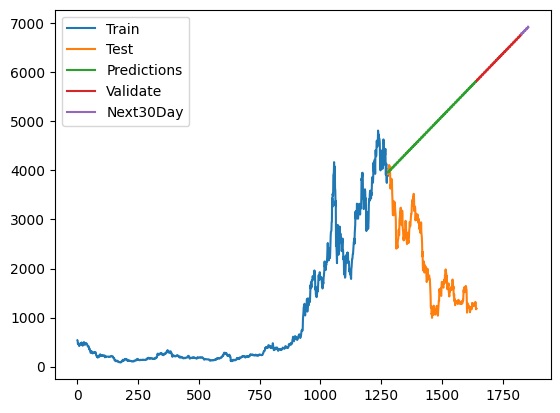

In [ ]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1278, stop=1643, step=1)

#6:2:2

In [ ]:
df=pd.read_csv('ETH-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]

In [ ]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# 6 : 2 : 2
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# define ES Model
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7)
# Fit mô hình vào dữ liệu
model_fit = model.fit()

In [ ]:
# 4. Quá trình testing
y_test = np.array(test_data['Close'])
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# 5. Quá trình Validate
y_val = np.array(val_data['Close'])
y_pred_val = model_fit.predict(start=val_data.index[0], end=val_data.index[-1])

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(start=last_index+1, end=last_index+30)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3402.3506133  3408.67835992 3400.68071769 3405.32513347 3413.24178045
 3429.99531653 3427.25278965 3413.92796691 3420.25571353 3412.2580713
 3416.90248708 3424.81913406 3441.57267014 3438.83014326 3425.50532052
 3431.83306714 3423.83542491 3428.47984069 3436.39648767 3453.15002375
 3450.40749687 3437.08267413 3443.41042075 3435.41277852 3440.0571943
 3447.97384128 3464.72737736 3461.98485048 3448.66002774 3454.98777437]


In [ ]:
# 7. Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(mean_absolute_error(y_pred_val, y_val))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)



Testing MAE: 828.2750894483041
Testing RMSE: 1039.5947148035905
Testing MAPE: 0.3342335221435476
---------------------------
Validation MAE: 1560.4643948146695
Validation RMSE: 39.50271376519175
Validation MAPE: 0.50380858456849


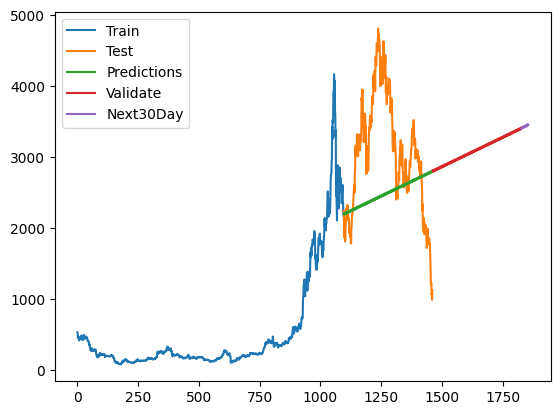

In [ ]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

#5:3:2

In [ ]:
# 5 : 3 : 2
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# define ES Model
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7)
# Fit mô hình vào dữ liệu
model_fit = model.fit()

In [ ]:
# 4. Quá trình testing
y_test = np.array(test_data['Close'])
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# 5. Quá trình Validate
y_val = np.array(val_data['Close'])
y_pred_val = model_fit.predict(start=val_data.index[0], end=val_data.index[-1])

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(start=last_index+1, end=last_index+30)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2780.93667279 2781.59782472 2784.79866168 2788.79825331 2791.12680305
 2794.23977886 2794.86344521 2797.19812199 2797.85927391 2801.06011087
 2805.05970251 2807.38825224 2810.50122806 2811.12489441 2813.45957118
 2814.12072311 2817.32156007 2821.3211517  2823.64970144 2826.76267725
 2827.38634361 2829.72102038 2830.3821723  2833.58300926 2837.5826009
 2839.91115063 2843.02412645 2843.6477928  2845.98246957 2846.6436215 ]


In [ ]:
# 7. Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(mean_absolute_error(y_pred_val, y_val))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)



Testing MAE: 1430.7658701288228
Testing RMSE: 1646.9636998045207
Testing MAPE: 1.1491370091420143
---------------------------
Validation MAE: 811.1530966234011
Validation RMSE: 28.480749579731942
Validation MAPE: 0.343718371074337


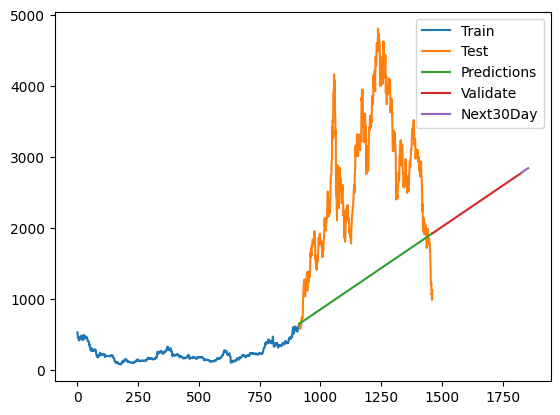

In [ ]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()